# 개인프로젝트 

사용 데이터 : 서울일자리센터 인재정보 직종별, 지역별 목록.csv

주제 : 서울일자리센터 인재정보를 활용하여 데이터 전처리과 기초통계량 분석 및 시각화 진행 - 서울시를 중심으로
## #01. 데이터 불러오기 
### 필요한 패키지 설치


In [1]:
import pandas as pd 


### 데이터 불러오기 

In [2]:
df = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv",encoding="euc-kr")


## #02. 데이터 확인

In [3]:
df.head()

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H117202307112815,남,62,J00110,대학_대학교,서울,강동구,서울,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,30:57.0,31:00.0
1,H117202307112803,남,66,J00104,중학교,경기,하남시,서울,강동구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,25:47.0,25:52.0
2,H117202307112802,남,63,J00106,고등학교,경기,고양시,서울,NaN,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,20:50.0,20:56.0
3,H117202307112790,남,68,J00110,대학_대학교,서울,강동구,서울,송파구,542002,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,12:26.0,12:33.0
4,H117202307112771,남,68,J00106,고등학교,서울,강동구,서울,송파구,26301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,07:38.0,07:42.0


In [4]:
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드             object
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망근무지역명(시도)_2      object
희망근무지역명(시군구)_2     object
희망직종공통코드            int64
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력년_월수         object
구직인증상태공통구분         object
구직인증상태공통구분명        object
검색키워드1             object
검색키워드2             object
검색키워드3             object
검색키워드4             object
검색키워드5             object
등록일시               object
수정일시               object
dtype: object

## #03. 데이터 전처리

### 1. 필요없는 변수 제거 

In [5]:

## 분석에 필요없는 희망직종경력년_월수, 구직인증상태공통구분 , 구직인증상태공통구분명, 검색키워드, 등록,수정일시
## + 희망직종공통코드  제거 + 학력 공통코드 제거 

df= df.iloc[:,:-9]
df = df.drop(columns=["희망직종공통코드","학력공통코드"])


In [6]:
## 희망근무지역은 1순위만 따지기 위해 2순위 칼럼 제거 
df = df.drop(columns=["희망근무지역명(시도)_2","희망근무지역명(시군구)_2"])
df

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입


### 2. 데이터 정제 
### (1) 결측치 제거

In [7]:
## 결측치 확인 
df.isnull().sum()



구직신청번호              0
성별                  0
나이                  0
학력공통코드명             0
희망근무지역(시도)_1       10
희망근무지역명(시군구)_1     79
희망직종공통코드명           0
희망직종경력년수          260
희망직종경력년_월수          0
dtype: int64

In [8]:
## 희망직종경력년수의 결측치 확인 
df[df['희망직종경력년수'].isnull()]
## 희망직종 경력이 결측치인 경우에는 희망직종 경력년_월수가 신입인 경우임.
## 따라서 희망직종경력년수의 결측치는 0으로 대치

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,NaN,신입
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,NaN,신입
...,...,...,...,...,...,...,...,...,...
572,H322202307051420,남,44,고등학교,서울,서초구,경비원(건물 관리원),NaN,신입
580,H001202306282863,남,64,전문대학,서울,NaN,기타 전기?전자 기기 설치?수리원,NaN,신입
598,H320202306142175,남,60,대학_대학교,서울,동작구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",NaN,신입
612,H325202305300855,여,50,고등학교,서울,강동구,사무 보조원(일반사업체),NaN,신입


In [9]:
df['희망직종경력년수']=df['희망직종경력년수'].fillna(value = 0)
df.isnull().sum()

구직신청번호             0
성별                 0
나이                 0
학력공통코드명            0
희망근무지역(시도)_1      10
희망근무지역명(시군구)_1    79
희망직종공통코드명          0
희망직종경력년수           0
희망직종경력년_월수         0
dtype: int64

In [10]:
## 희망근무지역 결측치 제거 
### 희망 근무지역의 결측치 행은 임의로 값을 추가하기엔 어렵다고 판단해서 희망근무지역의 결측치는 제거하기로 판단

df = df.dropna()
df.isnull().sum()

구직신청번호            0
성별                0
나이                0
학력공통코드명           0
희망근무지역(시도)_1      0
희망근무지역명(시군구)_1    0
희망직종공통코드명         0
희망직종경력년수          0
희망직종경력년_월수        0
dtype: int64

### (2) 파생변수 추가 

In [11]:
## 희망직종경력개월수 파생변수 만들어서 평균 경력분석 ㄱㄱ 
## 희망직종경력개월수에 대해 파악하기 위해 희망직종경력년수에 12를 곱합
df['희망직종경력개월수'] = df.loc[:,'희망직종경력년수'] * 12 
df

C:\Users\hamin\AppData\Local\Temp\ipykernel_18888\1050144636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['희망직종경력개월수'] = df.loc[:,'희망직종경력년수'] * 12


,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력년_월수,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
1,H117202307112803,남,66,중학교,경기,하남시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
2,H117202307112802,남,63,고등학교,경기,고양시,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
...,...,...,...,...,...,...,...,...,...,...
622,H311202304201914,여,69,고등학교,서울,노원구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",17.0,17년0월,204.0
623,H324202304181331,여,64,중학교,서울,송파구,재가 요양보호사,5.0,5년0월,60.0
624,H001202304180959,여,58,대학_대학교,서울,관악구,사회복지사,1.0,1년3월,12.0
625,H321202304141385,여,63,고등학교,서울,관악구,노인 생활지도원,0.0,신입,0.0


### (3) 변수의 값 정리

#### 희망직종경력년_월수


In [12]:
## 희망직종경력년수와 개월수 칼럼이 있기 떄문에 희망직종경력년_월수 칼럼을 신입과 경력으로 구분하고 칼럼이름 바꿈

df.loc[df['희망직종경력년_월수']!="신입","희망직종경력년_월수"] = "경력"
df = df.rename(columns={"희망직종경력년_월수": "희망직종경력유무"})
df.value_counts("희망직종경력유무")



희망직종경력유무
경력    314
신입    234
Name: count, dtype: int64

#### 희망근무지역

In [13]:
## 서울시를 중심으로 분석할 예정이기 떄무에 희망근무지역 = 서울로 데이터 정제 
df['희망근무지역(시도)_1'].unique()

df = df.loc[df['희망근무지역(시도)_1']=="서울",:]
df['희망근무지역(시도)_1'].unique()



array(['서울'], dtype=object)

###  최종 데이터 확인 .

In [14]:
df.head(5)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


In [15]:
df.info()
## 나이 희망직종경력년수 희망직종경력개월수 칼럼이 연속형변수 
## 나머지는 명목형 변수 
## 그룹바이 교차표 피벗테이블 -> melt 써보기 


<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 626
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구직신청번호          535 non-null    object 
 1   성별              535 non-null    object 
 2   나이              535 non-null    int64  
 3   학력공통코드명         535 non-null    object 
 4   희망근무지역(시도)_1    535 non-null    object 
 5   희망근무지역명(시군구)_1  535 non-null    object 
 6   희망직종공통코드명       535 non-null    object 
 7   희망직종경력년수        535 non-null    float64
 8   희망직종경력유무        535 non-null    object 
 9   희망직종경력개월수       535 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 46.0+ KB


## #04. 데이터 재구조화 

### 1. 데이터 집계

In [16]:
## 데이터 확인 
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


### (1) 피벗테이블을 이용한 평균나이 확인
        - 구직희망자들의 나이의 평균을 희망근무지역과 성별 따라 집계

In [17]:
pivot_df = pd.pivot_table(df,index="희망근무지역명(시군구)_1",columns="성별",values="나이")
pivot_df

성별,남,여
희망근무지역명(시군구)_1,,
강남구,64.875000,51.000000
강동구,63.916667,60.647059
강북구,62.333333,62.000000
강서구,63.083333,57.333333
관악구,56.727273,60.166667
광진구,57.750000,63.000000
구로구,64.470588,57.736842
금천구,61.571429,57.142857
노원구,67.166667,60.125000


### (2) 교차표를 이용한 데이터 비율 확인
    - 구직희망자들의 성별에 따른 경력유무의 비율을 집계

In [18]:
crosstab_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'],normalize=True,margins=True)

crosstab_df

경력유무,경력,신입,All
성별,,,
남,0.218692,0.224299,0.442991
여,0.360748,0.196262,0.557009
All,0.579439,0.420561,1.000000


### (3) GroupBy를 활용한 집계
    - 학력에 따른 구직자들의 나이에 대한 집계
    

In [19]:
group_df = df.filter(['학력공통코드명','나이']).groupby("학력공통코드명").agg(['min','max','median','mean'])
group_df


나이                      
        min max median       mean
학력공통코드명                          
고등학교     22  80   62.0  61.068670
관계없음     55  80   65.0  66.583333
대학_대학교   20  77   57.0  53.336842
무학력      59  68   64.0  63.750000
박사과정     66  66   66.0  66.000000
석사과정     56  66   64.0  63.000000
전문대학     25  72   52.0  51.485714
중학교      51  76   65.0  64.962617
초등학교     31  79   67.0  67.232558

## #05. 데이터 시각화

#### 필요한 패키지 설치


In [20]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np
import sys

#### 그래프 전역설정

In [21]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

In [22]:
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


### 1. Matplotlib 사용한 시각화



In [23]:
## 성별에 따른 경력유무 빈도수 데이터 추출
count_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'])

count_df
## 학력에 따른 빈도수 추출
school_df = pd.DataFrame(df.value_counts("학력공통코드명"))
school_df = school_df.reset_index()
school_df


,학력공통코드명,count
0,고등학교,233
1,중학교,107
2,대학_대학교,95
3,초등학교,43
4,전문대학,35
5,관계없음,12
6,석사과정,5
7,무학력,4
8,박사과정,1


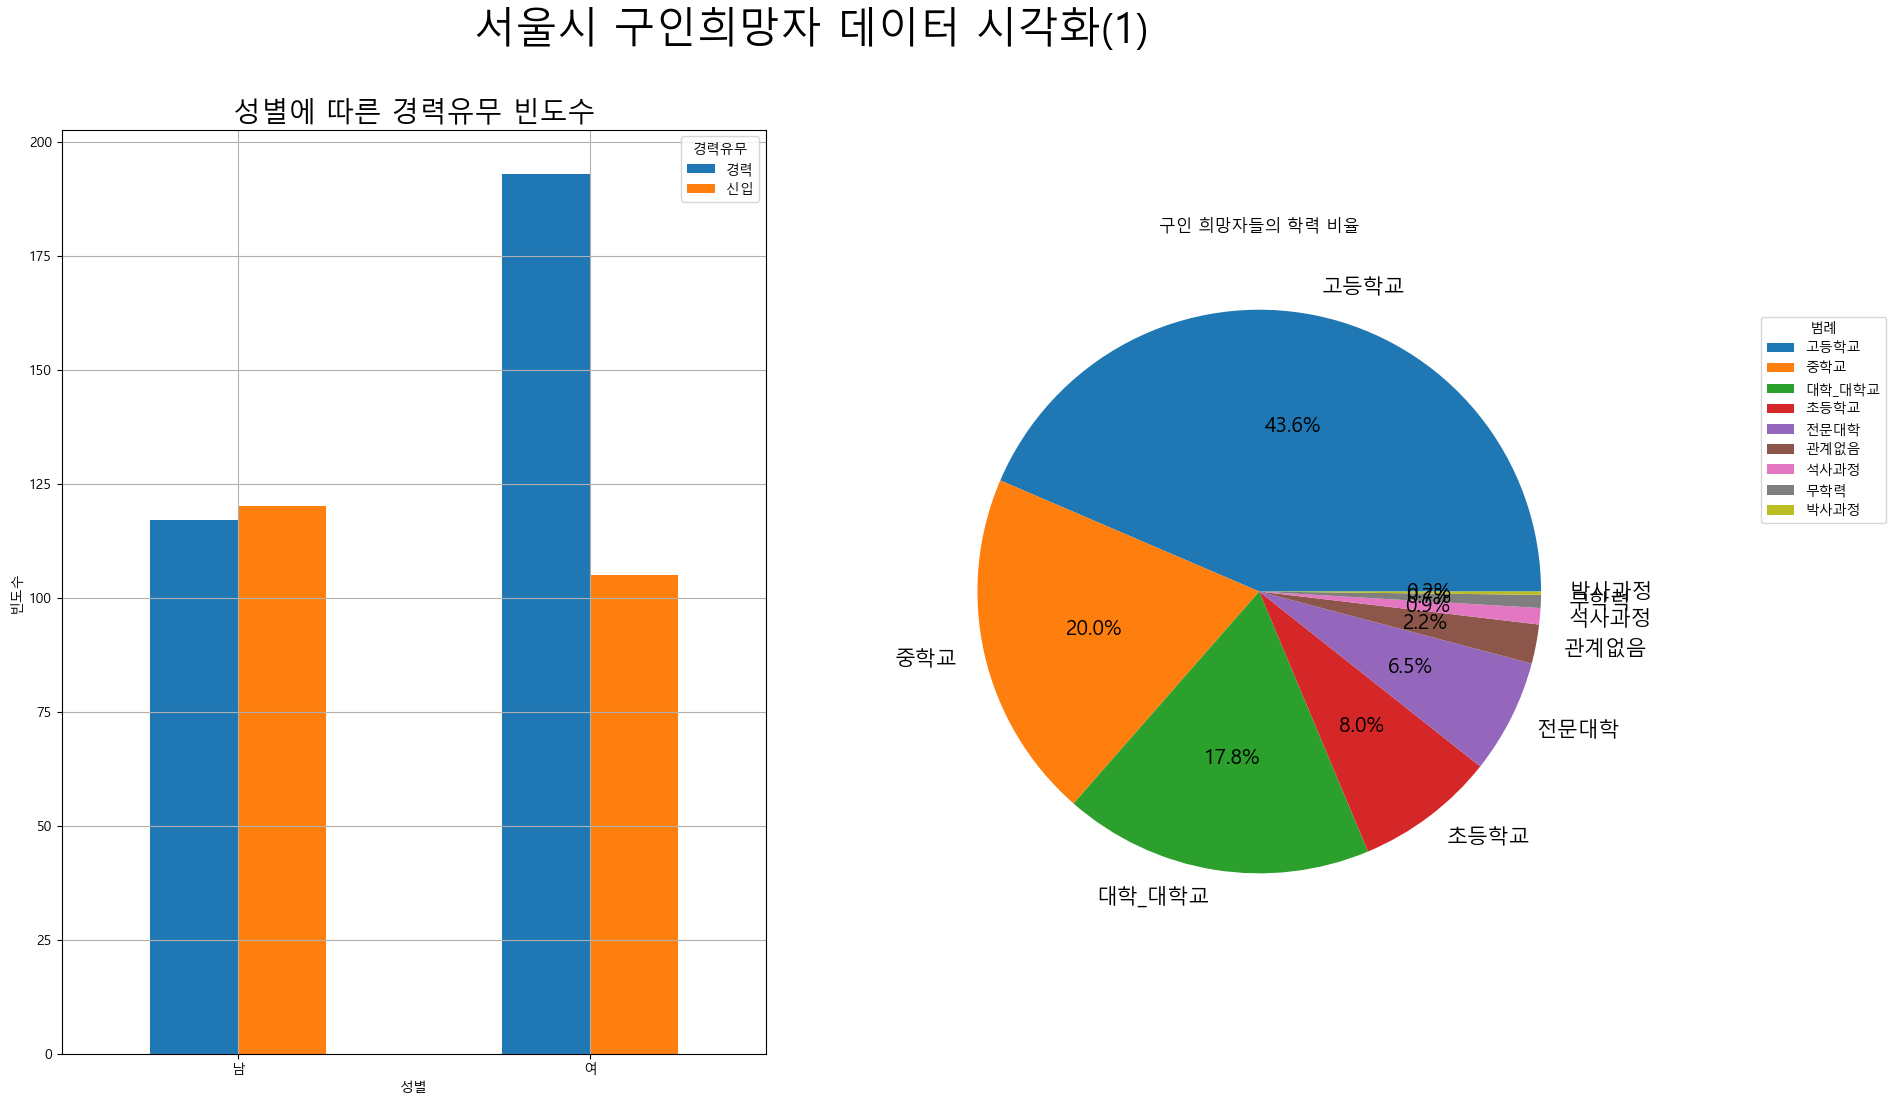

In [24]:

fig,ax = plt.subplots(1,2,figsize=(20,12))

## 데이터프레임을 기반으로 각 영역에 그래프 종류별 표시

## 전체 제목 

fig.suptitle("서울시 구인희망자 데이터 시각화(1)",fontsize=30)

## 각 그래프간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 성별에따른 경력유무의 빈도수에 대한 그래프
#--------------------------------------------------------------

## 성별에 따른 경력유무 빈도수 데이터 추출
count_df = pd.crosstab(index=df['성별'],columns=df['희망직종경력유무'],colnames=['경력유무'],rownames=['성별'])
## 그래프 작성
count_df.plot.bar(ax=ax[0],rot=0)
ax[0].grid()
ax[0].set_title('성별에 따른 경력유무 빈도수',fontsize=20)
ax[0].set(xlabel= "성별",ylabel="빈도수")

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 학력에 따른 파이차트
#--------------------------------------------------------------
## 학력에 따른 빈도수 추출
school_df = pd.DataFrame(df.value_counts("학력공통코드명"))
school_df = school_df.reset_index()
## 그래프 작성
school_df['count'].plot.pie(labels = school_df['학력공통코드명'], autopct="%0.1f%%",ax=ax[1],fontsize=15)
ax[1].set_title("구인 희망자들의 학력 비율")
ax[1].legend(labels=school_df['학력공통코드명'],title='범례',bbox_to_anchor=(1.4,0.9))
ax[1].set(ylabel=None)

plt.show()
plt.close()

### 2. Seaborn을 이용한 시각화

나이랑 경력년수 사이 상관관계 그래프 아니면 그냥그래프 ㄱㄱ 


나이랑 경력년수 산점도 + 추세선까지 

In [25]:
df.head()

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0


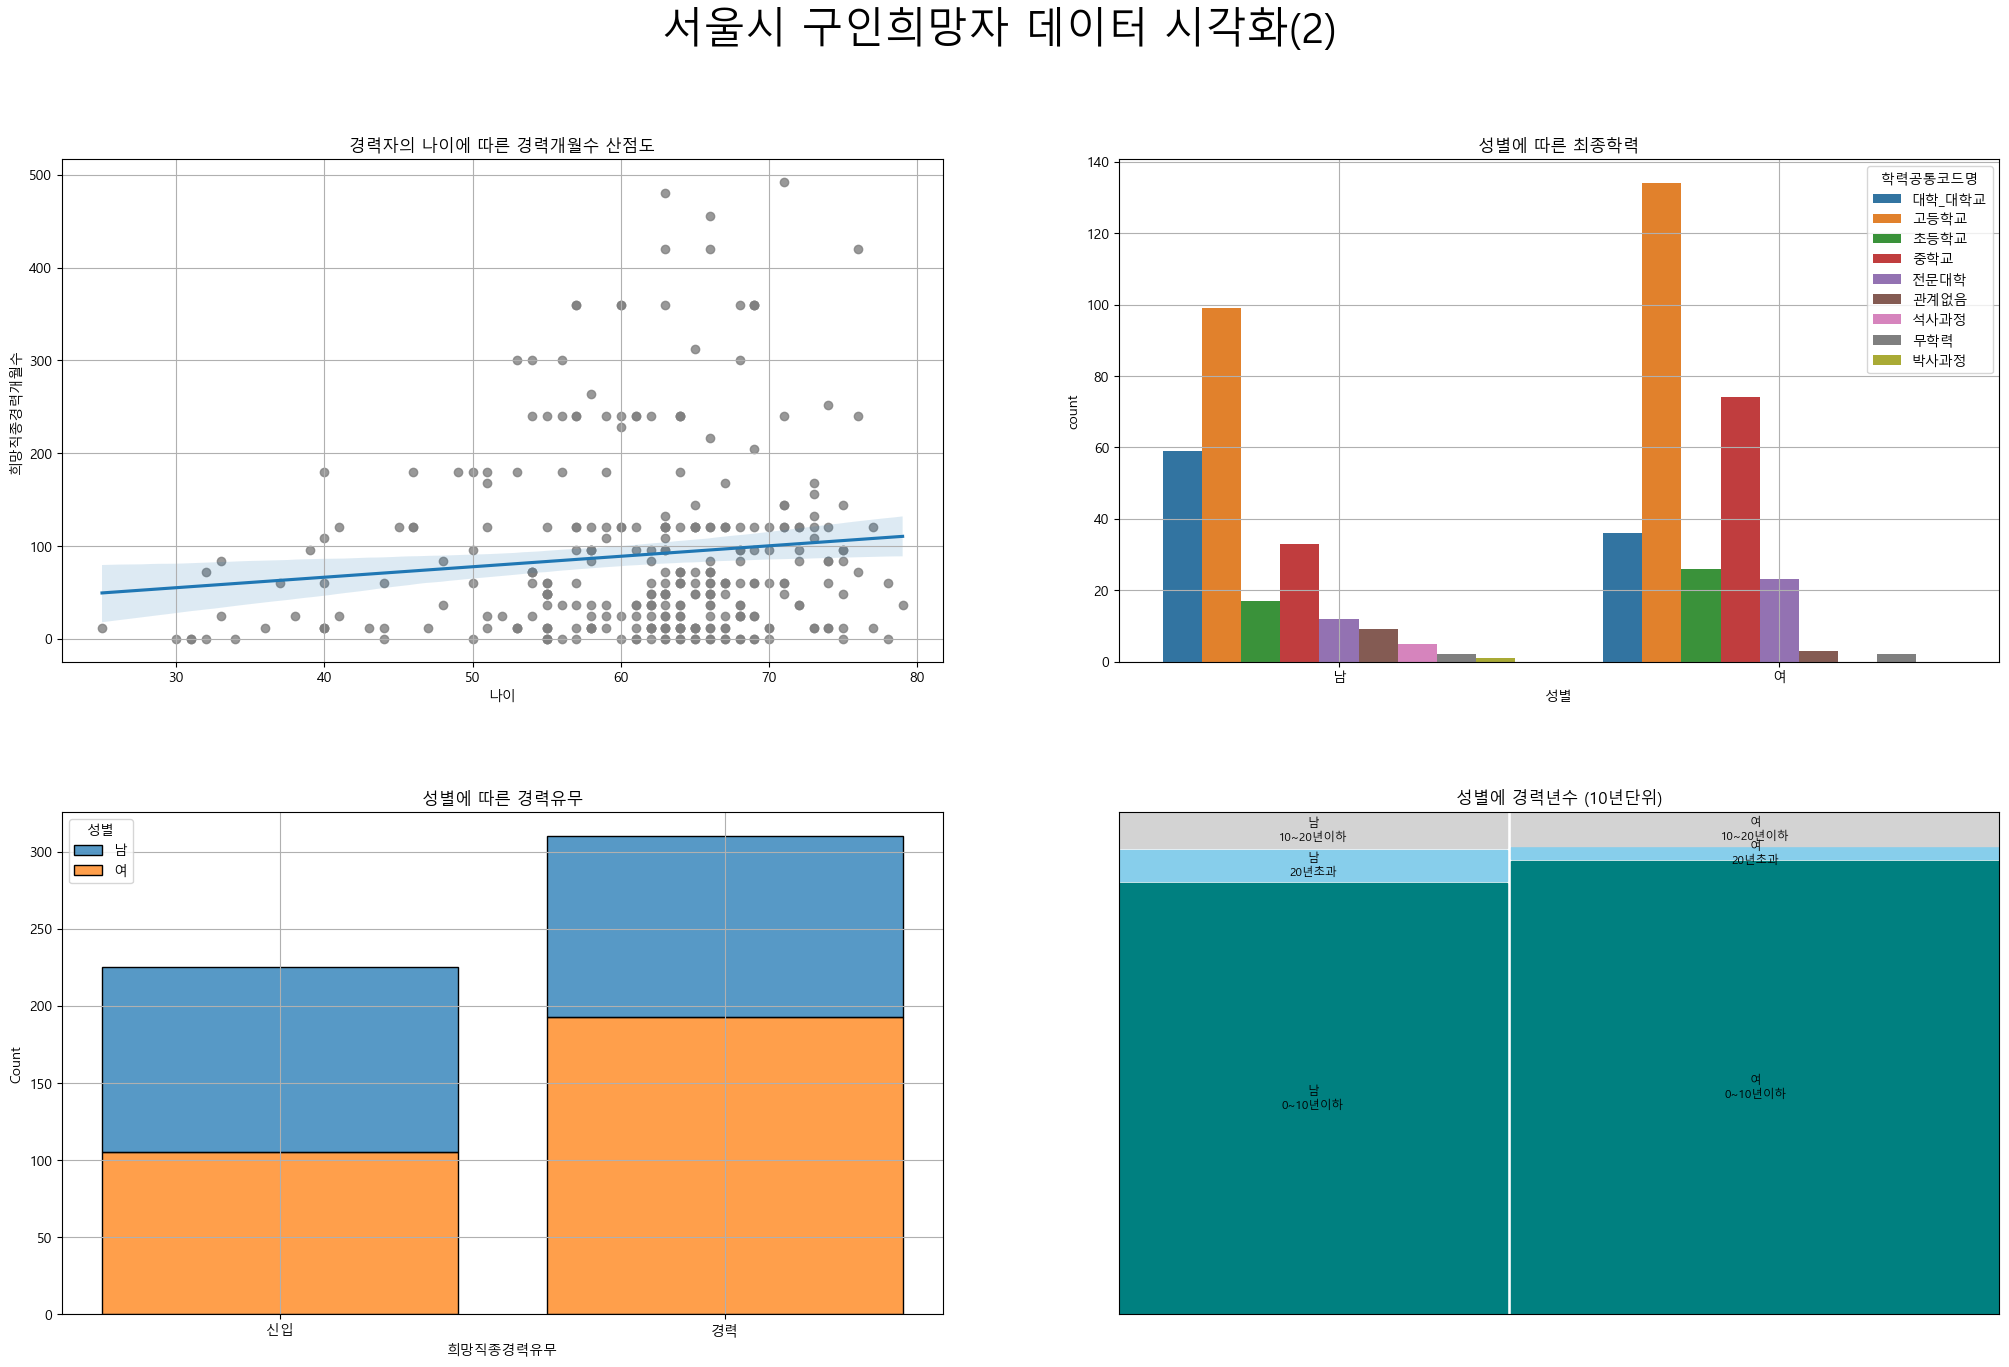

In [26]:

fig,ax = plt.subplots(2,2,figsize=(25,15))
## 데이터프레임을 기반으로 각 영역에 그래프 종류별 표시

## 전체 제목 ## x축을 나이로 둬도 되지않나

fig.suptitle("서울시 구인희망자 데이터 시각화(2)",fontsize=30)

## 각 그래프간의 가로 세로 간격 지정
fig.subplots_adjust(wspace=0.2,hspace=0.3)
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 경력자의 나이에 따른 희망직종경력개월수 산점도
#--------------------------------------------------------------

sb.regplot(data=df[df['희망직종경력유무']=="경력"],x='나이',y="희망직종경력개월수",
            scatter_kws={"color":"grey"}, label = "경력개월수",ax=ax[0][0])
ax[0][0].set_title("경력자의 나이에 따른 경력개월수 산점도")
ax[0][0].grid()
#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 성별에 따른 최종학력 막대그래프
#--------------------------------------------------------------

### 빈도수 계산을 위한 교차표 작성

sb.countplot(data =df , x="성별",hue='학력공통코드명',ax=ax[0][1])
ax[0][1].set_title("성별에 따른 최종학력")
ax[0][1].grid()

#--------------------------------------------------------------
# 세 번째 영역 그래프 표시 -> 성별에 따른 경력 유무 누적 막대그래프 
#--------------------------------------------------------------

sb.histplot(data= df ,x='희망직종경력유무',hue='성별',multiple='stack',shrink=.8,ax=ax[1][0])
ax[1][0].set_title("성별에 따른 경력유무")
ax[1][0].grid()
#--------------------------------------------------------------
# 네 번째 영역 그래프 표시 -> 전체 구인희망자들의 성별에 따른 경력년수(10년단위)
#--------------------------------------------------------------

## 그래프 작성하기 위한 파생변수 추가
df['희망직종경력(범주화)']  = df['희망직종경력년수']

df.loc[df['희망직종경력년수']<=10,'희망직종경력(범주화)'] = "0~10년이하"

df.loc[(df['희망직종경력년수']<=20)&(df['희망직종경력년수']>10),'희망직종경력(범주화)'] = "10~20년이하"

df.loc[(df['희망직종경력년수']>20),'희망직종경력(범주화)'] = "20년초과"
## 색깔 호출하는 함수 작성
def getColor(key):
    if "0~10년이하" in key :
        color = "teal"
    elif "10~20년이하" in key :
        color = "lightgray"
    else :
        color="skyblue"
    return {"color":color}
## 그래프 작성
mosaic(df,["성별",'희망직종경력(범주화)'], axes_label=False,ax=ax[1][1],
        properties= getColor)
ax[1][1].set_title("성별에 경력년수 (10년단위)")

plt.show()
plt.close()


Text(0.5, 1.0, '경력년수(10년단위)에 따른 최종학력')

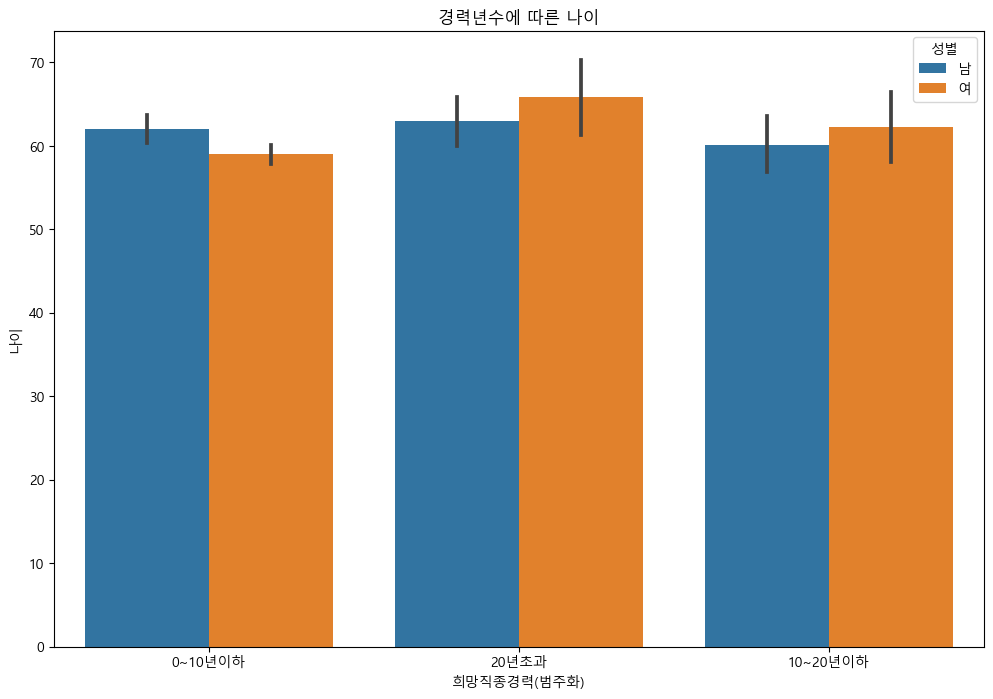

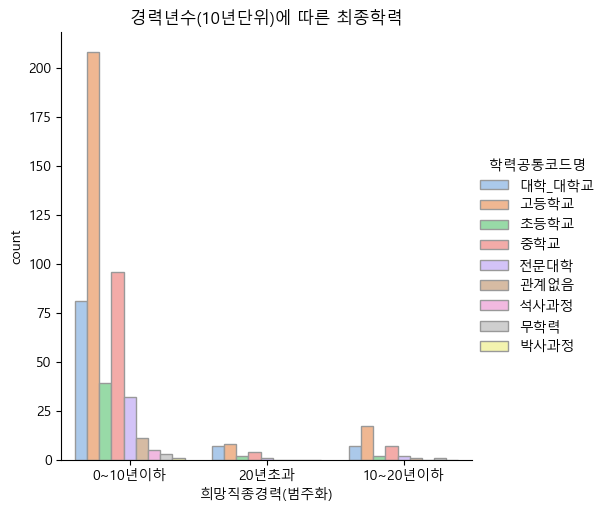

In [27]:
#--------------------------------------------------------------
# 첫 번째 영역 그래프 표시 -> 경력년수(10년단위)와 성별에 따른 평균나이
# #--------------------------------------------------------------

sb.barplot(x='희망직종경력(범주화)', y='나이', estimator="mean", hue="성별",data=df)
plt.title("경력년수에 따른 나이")

#--------------------------------------------------------------
# 두 번째 영역 그래프 표시 -> 경력년수(10년)에 따른 최종학력
# #--------------------------------------------------------------
sb.catplot(data=df,x="희망직종경력(범주화)",hue="학력공통코드명",kind = "count",palette='pastel'
,edgecolor='.6')
plt.title("경력년수(10년단위)에 따른 최종학력")


## #06.기술통계량 
### 1. 최종 데이터 확인 

In [28]:
df.head(5)


,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하


In [29]:
df.dtypes

구직신청번호             object
성별                 object
나이                  int64
학력공통코드명            object
희망근무지역(시도)_1       object
희망근무지역명(시군구)_1     object
희망직종공통코드명          object
희망직종경력년수          float64
희망직종경력유무           object
희망직종경력개월수         float64
희망직종경력(범주화)        object
dtype: object

### 2. 연속형 변수 통계량

#### (1) 나이 변수의 기술통계량

In [30]:
## 최대 최소값
max_age = df['나이'].max()
min_age = df['나이'].min()

print("구직 희망자의 나이의 범위는 {min_age}세 ~ {max_age}세 입니다.".format(max_age=max_age,min_age=min_age))
## 평균값
mean_age = round(df['나이'].mean(),2)
print("구직 희망자의 나이의 평균은 {mean_age}세 입니다.".format(mean_age=mean_age))

## 중앙값
median_age = round(df['나이'].median(),2)
print("구직 희망자의 나이의 중앙값 {median_age}세 입니다.".format(median_age=median_age))

## 통계량의 일괄 확인
df['나이'].describe()


구직 희망자의 나이의 범위는 20세 ~ 80세 입니다.
구직 희망자의 나이의 평균은 60.51세 입니다.
구직 희망자의 나이의 중앙값 63.0세 입니다.


count    535.000000
mean      60.514019
std       10.917090
min       20.000000
25%       56.000000
50%       63.000000
75%       68.000000
max       80.000000
Name: 나이, dtype: float64

### (2) 희망직종경력년수 변수의 기술통계량

In [31]:

## 경력이 있는데도 년수가 0 -> 이상치라고 판단하고 제거  : 33건의 데이터 제거
cond = (df['희망직종경력유무']=='경력') &  (df['희망직종경력년수']==0)
df = df[~cond]


## 신입의 경우 경력이 0년이기 때문에 경력이 있는 사람들을 기준으로 따로 집계
worked_df = df.loc[df['희망직종경력유무']=='경력']
worked_df


## 최대 최소 
max_year = worked_df.loc[df['희망직종경력유무']=='경력','희망직종경력년수'].max()
min_year= worked_df.loc[df['희망직종경력유무']=='경력','희망직종경력년수'].min()

print("경력의 범위는 {min_year}년 ~ {max_year}년 입니다.".format(min_year=min_year,max_year=max_year))

## 평균 
mean_year = worked_df['희망직종경력년수'].mean()

print("경력의 평균은 {mean_year}년 입니다.".format(mean_year=round(mean_year,2)))

## 중앙값

median_year = worked_df['희망직종경력년수'].median()

print("경력의 평균은 {median_year}년 입니다.".format(median_year=round(median_year,2)))

## 통계량의 일괄확인

worked_df['희망직종경력년수'].describe()

경력의 범위는 1.0년 ~ 41.0년 입니다.
경력의 평균은 8.41년 입니다.
경력의 평균은 6.0년 입니다.


count    277.000000
mean       8.411552
std        8.282836
min        1.000000
25%        2.000000
50%        6.000000
75%       10.000000
max       41.000000
Name: 희망직종경력년수, dtype: float64

### 3. 기술 통계량의 시각화 

#### (1) 그래프 전역설정

In [32]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False


### (2) 서브플롯을 활용한 상자그림 확인

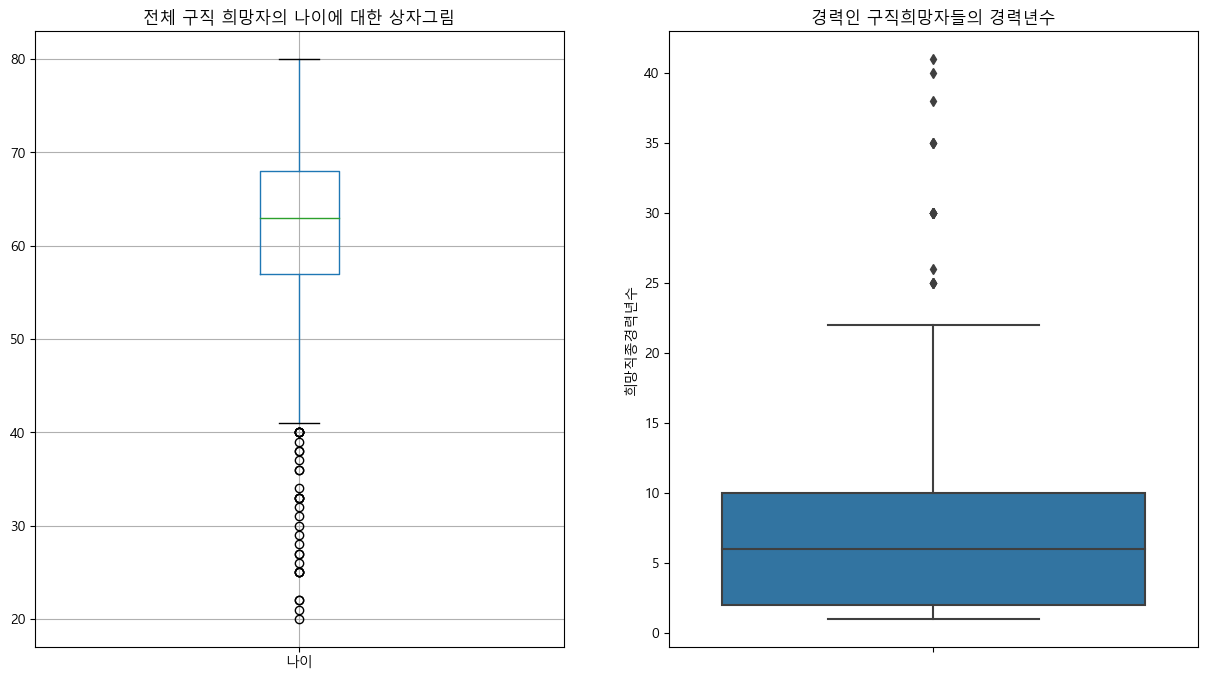

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
df.boxplot(['나이'],ax=ax[0])
ax[0].set_title("전체 구직 희망자의 나이에 대한 상자그림")


sb.boxplot(data=worked_df,y="희망직종경력년수",ax=ax[1])
ax[1].set_title("경력인 구직희망자들의 경력년수")
plt.show()
plt.close()

### 4 이상치 정제 
#### (1) 나이 변수 

In [34]:
## 이상치의 경계값
age_Q1 = df['나이'].quantile(0.25)
age_Q3 = df['나이'].quantile(0.75)

age_IQR = age_Q3 - age_Q1

age_low = age_Q1 - 1.5 * age_IQR

print("나이에 대한 하한은 %f" % age_low)
print("-"*35)
age_high = age_Q3 + 1.5 * age_IQR
print("나이에 대한 상한은 %f" % age_high)

## 이상치 확인
df[df['나이']<=age_low]
age_low_length = len(df[df['나이']<=age_low])

df[df['나이']<=age_low]
age_high_length = len(df[df['나이']>=age_high])

age_length = age_low_length + age_high_length
print("-"*35)
print("나이 변수의 이상치의 길이 :  ",age_length)

나이에 대한 하한은 40.500000
-----------------------------------
나이에 대한 상한은 84.500000
-----------------------------------
나이 변수의 이상치의 길이 :   33


#### (2) 희망직종경력년수 변수 

In [42]:
## 이상치의 경계값
year_Q1 = worked_df['희망직종경력년수'].quantile(0.25)
year_Q3 = worked_df['희망직종경력년수'].quantile(0.75)

year_IQR = year_Q3 - year_Q1

out_low = year_Q1 - 1.5 * year_IQR

print("희망직종경력년수에 대한 하한은 %f" % out_low)
print("-"*35)
out_high = year_Q3 + 1.5 * year_IQR
print("희망직종경력년수에 대한 상한은 %f" % out_high)

# ## 이상치 확인
worked_df[worked_df['희망직종경력년수']<=out_low]
year_low_length = len(worked_df[worked_df['희망직종경력년수']<=out_low])

year_high_length = len(worked_df[worked_df['희망직종경력년수']>=out_high])

year_length = year_low_length + year_high_length

print("-"*35)
print("희망직종경력년수 변수 이상치의 길이 :  ",year_length)

희망직종경력년수에 대한 하한은 -10.000000
-----------------------------------
희망직종경력년수에 대한 상한은 22.000000
-----------------------------------
희망직종경력년수 변수 이상치의 길이 :   21


In [43]:

df['희망직종경력년수'].unique()

array([ 0.,  6.,  8.,  1.,  2., 30., 15.,  3., 10.,  5., 20.,  7.,  4.,
       35., 41., 11., 14., 19., 12., 13., 25.,  9., 22., 21., 18., 38.,
       40., 26., 17.])

In [44]:
df.head(20)

,구직신청번호,성별,나이,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망직종공통코드명,희망직종경력년수,희망직종경력유무,희망직종경력개월수,희망직종경력(범주화)
0,H117202307112815,남,62,대학_대학교,서울,강동구,청소원,0.0,신입,0.0,0~10년이하
3,H117202307112790,남,68,대학_대학교,서울,강동구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
4,H117202307112771,남,68,고등학교,서울,강동구,총무 및 일반 사무원,0.0,신입,0.0,0~10년이하
5,H311202307112706,여,67,대학_대학교,서울,노원구,도서 정리원,0.0,신입,0.0,0~10년이하
6,H116202307112652,남,69,초등학교,서울,성북구,청소원,0.0,신입,0.0,0~10년이하
7,H316202307112619,여,61,고등학교,서울,강서구,제조 단순 종사원,0.0,신입,0.0,0~10년이하
8,H117202307112609,남,62,중학교,서울,송파구,"건물 경비원(청사,학교,병원,상가,빌딩,공장 등)",0.0,신입,0.0,0~10년이하
9,H321202307112608,남,54,대학_대학교,서울,관악구,재가 요양보호사,6.0,경력,72.0,0~10년이하
10,H309202307112596,여,63,고등학교,서울,성북구,재가 요양보호사,8.0,경력,96.0,0~10년이하
11,H121202307112490,여,55,중학교,서울,동대문구,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",1.0,경력,12.0,0~10년이하


#### (3) 데이터에 적용

In [45]:
## 나이 변수 적용
print("이상치 제거 전 데이터 길이 : ",len(df))
df = df[(df['나이']>age_low)&(df['나이']<age_high)]

print('-'*30)
print("나이 변수 이상치 제거 후 데이터 길이 : ",len(df))

이상치 제거 전 데이터 길이 :  469
------------------------------
나이 변수 이상치 제거 후 데이터 길이 :  469


In [46]:
## 희망직종경략년수 변수 적용
## 희망직종경력이 신입인 구직희망자들은 경력이 0년이기 때문에 경력이 구직희망자들을 기준으로 진행

# # print("이상치 제거 전 데이터 길이 : ",len(df))
# df = df[(df['나이']>age_low)&(df['나이']<age_high)]
# print('-'*30)
# print("나이 변수 이상치 제거 후 데이터 길이 : ",len(df))

In [47]:
len(df[df['희망직종경력년수']>=out_high])

21

In [50]:
print("이상치 제거 전 데이터 길이 : ",len(df))
# 이상치를 결측치로 바꾼다음 -> 결측치를 제거하는 과정으로 진행
# 필요한 패키지 설치 및 모듈 호출
import sys
import os 
sys.path.append(os.path.dirname(os.getcwd()))
from helper import getIq, replaceOutlier
cond = df['희망직종경력유무'] == '경력'
df[cond] = replaceOutlier(df[cond],"희망직종경력년수")
# df.dropna(axis=0)
print("나이 변수 이상치 제거 후 데이터 길이 : ",len(df))


이상치 제거 전 데이터 길이 :  469
나이 변수 이상치 제거 후 데이터 길이 :  469


In [54]:
df.isnull().sum()

구직신청번호             0
성별                 0
나이                 0
학력공통코드명            0
희망근무지역(시도)_1       0
희망근무지역명(시군구)_1     0
희망직종공통코드명          0
희망직종경력년수          40
희망직종경력유무           0
희망직종경력개월수          0
희망직종경력(범주화)        0
dtype: int64